<a href="https://colab.research.google.com/github/mdsiam135/research/blob/main/Extra_Trees_Classifier(3_labels).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading datasets...
Training set shape: (3584, 84)
Validation set shape: (768, 84)
Test set shape: (768, 84)

Creating quantile-based labels...
Quantile boundaries: Low (≤1067.25), Medium (1067.25-3903.37), High (>3903.37)

Class distribution:
Training set:
Production_Category
0    1197
1    1189
2    1198
Name: count, dtype: int64
Validation set:
Production_Category
0    252
1    259
2    257
Name: count, dtype: int64
Test set:
Production_Category
0    256
1    262
2    250
Name: count, dtype: int64

Preparing features...
Number of features: 83

Training Extra Trees Classifier for 10 iterations...
Epoch 1: Train Acc: 1.0000, Val Acc: 0.9102, Train F1: 1.0000, Val F1: 0.9109
Epoch 2: Train Acc: 1.0000, Val Acc: 0.9115, Train F1: 1.0000, Val F1: 0.9125
Epoch 3: Train Acc: 1.0000, Val Acc: 0.9128, Train F1: 1.0000, Val F1: 0.9137
Epoch 4: Train Acc: 1.0000, Val Acc: 0.9206, Train F1: 1.0000, Val F1: 0.9213
Epoch 5: Train Acc: 1.0000, Val Acc: 0.9232, Train F1: 1.0000, Val F1: 0.9238
Epoc

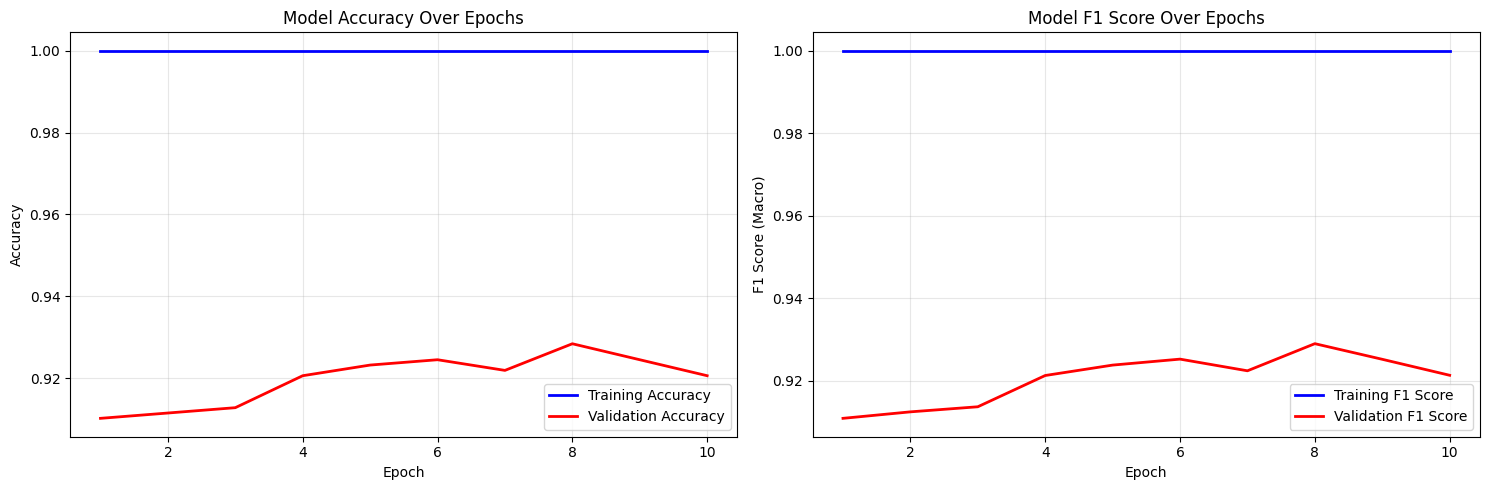

FINAL MODEL EVALUATION

Evaluating on Training set...
Accuracy: 1.0000
Precision (Macro): 1.0000
Recall (Macro): 1.0000
F1 Score (Macro): 1.0000
F1 Score (Weighted): 1.0000

Evaluating on Validation set...
Accuracy: 0.9206
Precision (Macro): 0.9222
Recall (Macro): 0.9208
F1 Score (Macro): 0.9213
F1 Score (Weighted): 0.9210

Evaluating on Test set...
Accuracy: 0.9297
Precision (Macro): 0.9309
Recall (Macro): 0.9297
F1 Score (Macro): 0.9302
F1 Score (Weighted): 0.9299


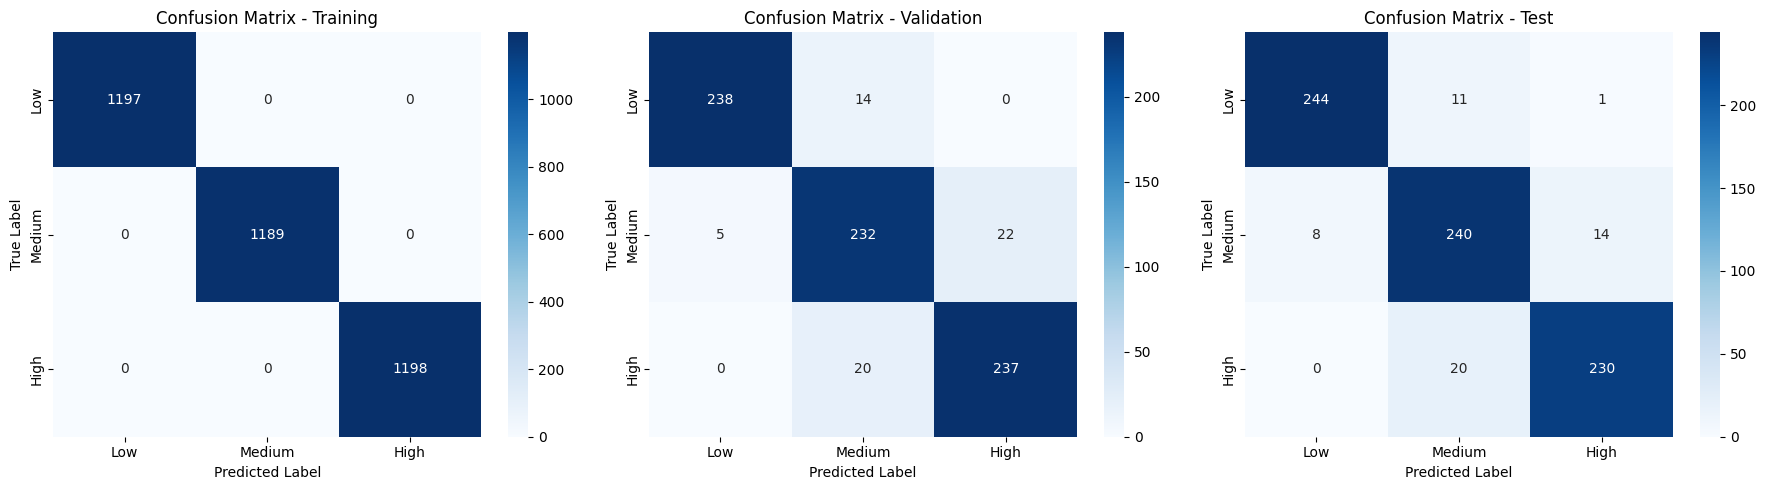

<Figure size 640x480 with 0 Axes>

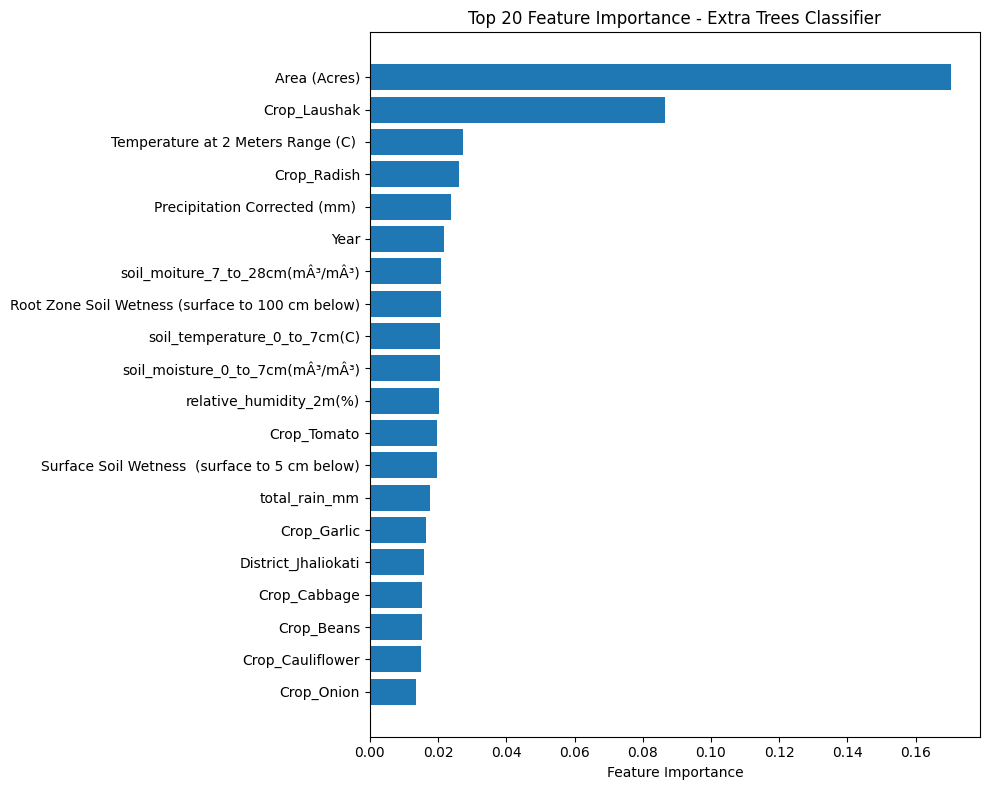


SUMMARY OF RESULTS
      Dataset  Accuracy  Precision (Macro)  Recall (Macro)  F1 Score (Macro)  \
0    Training    1.0000             1.0000          1.0000            1.0000   
1  Validation    0.9206             0.9222          0.9208            0.9213   
2        Test    0.9297             0.9309          0.9297            0.9302   

   F1 Score (Weighted)  
0               1.0000  
1               0.9210  
2               0.9299  

Model training and evaluation completed successfully!
Key metrics calculated:
- Accuracy, Precision, Recall, F1 Score (Macro & Weighted)
- Confusion matrices for all datasets
- Training history plots
- Feature importance analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, precision_recall_fscore_support)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

class ProductionClassifier:
    def __init__(self, n_estimators=100, random_state=42):
        """
        Initialize the Extra Trees Classifier model

        Parameters:
        n_estimators: Number of trees in the forest
        random_state: Random state for reproducibility
        """
        self.model = ExtraTreesClassifier(
            n_estimators=n_estimators,
            random_state=random_state,
            n_jobs=-1
        )
        self.scaler = StandardScaler()
        self.feature_columns = None
        self.target_column = 'Production (M.Ton)'
        self.class_labels = ['Low', 'Medium', 'High']

    def load_data(self, train_path, val_path, test_path):
        """
        Load training, validation, and test datasets
        """
        print("Loading datasets...")
        self.train_df = pd.read_csv('/content/drive/MyDrive/Yearbook of Agricultural Statistics/train.csv')
        self.val_df = pd.read_csv('/content/drive/MyDrive/Yearbook of Agricultural Statistics/validation.csv')
        self.test_df = pd.read_csv('/content/drive/MyDrive/Yearbook of Agricultural Statistics/test.csv')

        print(f"Training set shape: {self.train_df.shape}")
        print(f"Validation set shape: {self.val_df.shape}")
        print(f"Test set shape: {self.test_df.shape}")

        return self.train_df, self.val_df, self.test_df

    def create_quantile_labels(self):
        """
        Create quantile-based labels for production values
        """
        print("\nCreating quantile-based labels...")

        # Combine all datasets to calculate consistent quantiles
        all_production = pd.concat([
            self.train_df[self.target_column],
            self.val_df[self.target_column],
            self.test_df[self.target_column]
        ])

        # Calculate quantiles (33.33% and 66.67%)
        q33 = all_production.quantile(0.333)
        q67 = all_production.quantile(0.667)

        print(f"Quantile boundaries: Low (≤{q33:.2f}), Medium ({q33:.2f}-{q67:.2f}), High (>{q67:.2f})")

        # Create labels for each dataset
        def categorize_production(production):
            if production <= q33:
                return 0  # Low
            elif production <= q67:
                return 1  # Medium
            else:
                return 2  # High

        self.train_df['Production_Category'] = self.train_df[self.target_column].apply(categorize_production)
        self.val_df['Production_Category'] = self.val_df[self.target_column].apply(categorize_production)
        self.test_df['Production_Category'] = self.test_df[self.target_column].apply(categorize_production)

        # Print class distribution
        print("\nClass distribution:")
        print("Training set:")
        print(self.train_df['Production_Category'].value_counts().sort_index())
        print("Validation set:")
        print(self.val_df['Production_Category'].value_counts().sort_index())
        print("Test set:")
        print(self.test_df['Production_Category'].value_counts().sort_index())

    def prepare_features(self):
        """
        Prepare features for training
        """
        print("\nPreparing features...")

        # Exclude target columns
        exclude_cols = [self.target_column, 'Production_Category']
        self.feature_columns = [col for col in self.train_df.columns if col not in exclude_cols]

        # Prepare feature matrices
        X_train = self.train_df[self.feature_columns]
        X_val = self.val_df[self.feature_columns]
        X_test = self.test_df[self.feature_columns]

        # Prepare target vectors
        y_train = self.train_df['Production_Category']
        y_val = self.val_df['Production_Category']
        y_test = self.test_df['Production_Category']

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)
        X_test_scaled = self.scaler.transform(X_test)

        print(f"Number of features: {len(self.feature_columns)}")

        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test

    def train_model(self, X_train, y_train, X_val, y_val, epochs=10):
        """
        Train the Extra Trees model with multiple epochs
        Note: Extra Trees doesn't have traditional epochs like neural networks,
        but we can simulate this by training multiple models and tracking performance
        """
        print(f"\nTraining Extra Trees Classifier for {epochs} iterations...")

        train_accuracies = []
        val_accuracies = []
        train_f1_scores = []
        val_f1_scores = []

        # Train for specified number of epochs
        for epoch in range(1, epochs + 1):
            # Train model with increasing number of estimators
            n_estimators = epoch * 10
            temp_model = ExtraTreesClassifier(
                n_estimators=n_estimators,
                random_state=42,
                n_jobs=-1
            )
            temp_model.fit(X_train, y_train)

            # Predictions
            train_pred = temp_model.predict(X_train)
            val_pred = temp_model.predict(X_val)

            # Calculate metrics
            train_acc = accuracy_score(y_train, train_pred)
            val_acc = accuracy_score(y_val, val_pred)
            train_f1 = f1_score(y_train, train_pred, average='macro')
            val_f1 = f1_score(y_val, val_pred, average='macro')

            train_accuracies.append(train_acc)
            val_accuracies.append(val_acc)
            train_f1_scores.append(train_f1)
            val_f1_scores.append(val_f1)

            print(f"Epoch {epoch}: Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, "
                  f"Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}")

        # Final model training
        self.model.fit(X_train, y_train)

        return train_accuracies, val_accuracies, train_f1_scores, val_f1_scores

    def evaluate_model(self, X, y, dataset_name):
        """
        Evaluate the model and return comprehensive metrics
        """
        print(f"\nEvaluating on {dataset_name} set...")

        # Predictions
        y_pred = self.model.predict(X)

        # Calculate metrics
        accuracy = accuracy_score(y, y_pred)
        precision_macro = precision_score(y, y_pred, average='macro')
        recall_macro = recall_score(y, y_pred, average='macro')
        f1_macro = f1_score(y, y_pred, average='macro')
        f1_weighted = f1_score(y, y_pred, average='weighted')

        # Per-class metrics
        precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
            y, y_pred, average=None
        )

        # Classification report
        class_report = classification_report(
            y, y_pred,
            target_names=self.class_labels,
            output_dict=True
        )

        # Confusion matrix
        cm = confusion_matrix(y, y_pred)

        # Print metrics
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (Macro): {precision_macro:.4f}")
        print(f"Recall (Macro): {recall_macro:.4f}")
        print(f"F1 Score (Macro): {f1_macro:.4f}")
        print(f"F1 Score (Weighted): {f1_weighted:.4f}")

        metrics = {
            'accuracy': accuracy,
            'precision_macro': precision_macro,
            'recall_macro': recall_macro,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'precision_per_class': precision_per_class,
            'recall_per_class': recall_per_class,
            'f1_per_class': f1_per_class,
            'confusion_matrix': cm,
            'classification_report': class_report,
            'predictions': y_pred
        }

        return metrics

    def plot_confusion_matrix(self, cm, dataset_name, ax=None):
        """
        Plot confusion matrix
        """
        if ax is None:
            plt.figure(figsize=(8, 6))
            ax = plt.gca()

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_labels,
                   yticklabels=self.class_labels, ax=ax)
        ax.set_title(f'Confusion Matrix - {dataset_name}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

        if ax == plt.gca():
            plt.tight_layout()
            plt.show()

    def plot_training_history(self, train_acc, val_acc, train_f1, val_f1):
        """
        Plot training and validation metrics over epochs
        """
        epochs = range(1, len(train_acc) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Plot accuracy
        ax1.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
        ax1.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
        ax1.set_title('Model Accuracy Over Epochs')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot F1 score
        ax2.plot(epochs, train_f1, 'b-', label='Training F1 Score', linewidth=2)
        ax2.plot(epochs, val_f1, 'r-', label='Validation F1 Score', linewidth=2)
        ax2.set_title('Model F1 Score Over Epochs')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('F1 Score (Macro)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def feature_importance(self, top_n=20):
        """
        Display feature importance
        """
        if self.model is None:
            print("Model not trained yet!")
            return

        # Get feature importance
        importance = self.model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'feature': self.feature_columns,
            'importance': importance
        }).sort_values('importance', ascending=False)

        # Plot top features
        plt.figure(figsize=(10, 8))
        top_features = feature_importance_df.head(top_n)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top {top_n} Feature Importance - Extra Trees Classifier')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

        return feature_importance_df

# Main execution function
def main():
    """
    Main function to run the complete pipeline
    """
    # Initialize classifier
    classifier = ProductionClassifier(n_estimators=100)

    # Load data (you need to provide the actual file paths)
    train_df, val_df, test_df = classifier.load_data('train.csv', 'validation.csv', 'test.csv')

    # Create quantile labels
    classifier.create_quantile_labels()

    # Prepare features
    X_train, X_val, X_test, y_train, y_val, y_test = classifier.prepare_features()

    # Train model
    train_acc, val_acc, train_f1, val_f1 = classifier.train_model(
        X_train, y_train, X_val, y_val, epochs=10
    )

    # Plot training history
    classifier.plot_training_history(train_acc, val_acc, train_f1, val_f1)

    # Evaluate on all datasets
    print("="*50)
    print("FINAL MODEL EVALUATION")
    print("="*50)

    # Training set evaluation
    train_metrics = classifier.evaluate_model(X_train, y_train, "Training")

    # Validation set evaluation
    val_metrics = classifier.evaluate_model(X_val, y_val, "Validation")

    # Test set evaluation
    test_metrics = classifier.evaluate_model(X_test, y_test, "Test")

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    classifier.plot_confusion_matrix(train_metrics['confusion_matrix'], "Training", axes[0])
    classifier.plot_confusion_matrix(val_metrics['confusion_matrix'], "Validation", axes[1])
    classifier.plot_confusion_matrix(test_metrics['confusion_matrix'], "Test", axes[2])
    plt.tight_layout()
    plt.show()

    # Display feature importance
    feature_importance_df = classifier.feature_importance()

    # Summary table
    print("\n" + "="*60)
    print("SUMMARY OF RESULTS")
    print("="*60)

    summary_df = pd.DataFrame({
        'Dataset': ['Training', 'Validation', 'Test'],
        'Accuracy': [train_metrics['accuracy'], val_metrics['accuracy'], test_metrics['accuracy']],
        'Precision (Macro)': [train_metrics['precision_macro'], val_metrics['precision_macro'], test_metrics['precision_macro']],
        'Recall (Macro)': [train_metrics['recall_macro'], val_metrics['recall_macro'], test_metrics['recall_macro']],
        'F1 Score (Macro)': [train_metrics['f1_macro'], val_metrics['f1_macro'], test_metrics['f1_macro']],
        'F1 Score (Weighted)': [train_metrics['f1_weighted'], val_metrics['f1_weighted'], test_metrics['f1_weighted']]
    })

    print(summary_df.round(4))

    return classifier, train_metrics, val_metrics, test_metrics

# Run the complete pipeline
if __name__ == "__main__":
    # Note: Make sure your CSV files are in the correct path
    # You may need to adjust the file paths in the load_data function call

    classifier, train_metrics, val_metrics, test_metrics = main()

    print("\nModel training and evaluation completed successfully!")
    print("Key metrics calculated:")
    print("- Accuracy, Precision, Recall, F1 Score (Macro & Weighted)")
    print("- Confusion matrices for all datasets")
    print("- Training history plots")
    print("- Feature importance analysis")